In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#sns.set(color_codes=True)

%matplotlib inline

In [3]:
#Reading the required dataset
data=pd.read_csv('diabetes_data_upload.csv')

In [4]:
data.shape

(520, 17)

In [5]:
#To display the first 5 entries of the dataset
data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
#Checking the datatypes of different rows
data.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [7]:
#Renaming the "class" column to "Diabetes" for better understanding of dataset
data=data.rename(columns={"class":"Diabetes"})

In [8]:
data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [9]:
#Checking if there are any duplicate rows
data_duplicated_rows=data[data.duplicated()]
print("Number of duplicated rows are : ",data_duplicated_rows.shape)

Number of duplicated rows are :  (269, 17)


In [10]:
#Counting the rows before removing the duplicates
data.count()

Age                   520
Gender                520
Polyuria              520
Polydipsia            520
sudden weight loss    520
weakness              520
Polyphagia            520
Genital thrush        520
visual blurring       520
Itching               520
Irritability          520
delayed healing       520
partial paresis       520
muscle stiffness      520
Alopecia              520
Obesity               520
Diabetes              520
dtype: int64

In [11]:
#Removing the Duplicated values
data=data.drop_duplicates()

In [12]:
#Counting the rows after removing the duplicates
data.count()

Age                   251
Gender                251
Polyuria              251
Polydipsia            251
sudden weight loss    251
weakness              251
Polyphagia            251
Genital thrush        251
visual blurring       251
Itching               251
Irritability          251
delayed healing       251
partial paresis       251
muscle stiffness      251
Alopecia              251
Obesity               251
Diabetes              251
dtype: int64

In [13]:
#Checking whether Null values exist in data or not
print(data.isnull().sum())

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
Diabetes              0
dtype: int64


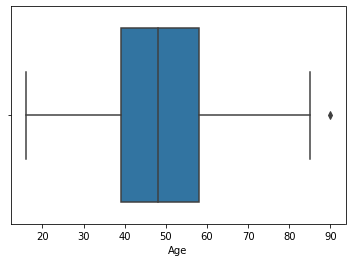

In [14]:
#Detecting Outliers
sns.boxplot(x=data['Age'])

In [15]:
#changing the data set values to 0/1 for better application of algorithm
first_map={'Positive': 1,'Negative': 0}
other_map={'Yes': 1,'No': 0}

In [16]:
data['Diabetes']=data['Diabetes'].map(first_map)
data['Polyuria']=data['Polyuria'].map(other_map)
data['Polydipsia']=data['Polydipsia'].map(other_map)
data['sudden weight loss']=data['sudden weight loss'].map(other_map)
data['weakness']=data['weakness'].map(other_map)
data['Polyphagia']=data['Polyphagia'].map(other_map)
data['Genital thrush']=data['Genital thrush'].map(other_map)
data['visual blurring']=data['visual blurring'].map(other_map)
data['Itching']=data['Itching'].map(other_map)
data['Irritability']=data['Irritability'].map(other_map)
data['delayed healing']=data['delayed healing'].map(other_map)
data['partial paresis']=data['partial paresis'].map(other_map)
data['muscle stiffness']=data['muscle stiffness'].map(other_map)
data['Alopecia']=data['Alopecia'].map(other_map)
data['Obesity']=data['Obesity'].map(other_map)

In [17]:
#To print any 10 sample values from the dataset
data.sample(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes
155,33,Male,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
214,47,Male,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
210,39,Male,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
51,50,Female,1,1,1,1,1,0,1,0,0,0,1,0,0,0,1
204,30,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
137,58,Male,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
232,56,Male,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0
24,58,Male,1,1,1,1,1,0,1,0,0,1,1,1,0,1,1
143,53,Male,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1


In [18]:
#Finding correlation between data
#T - to get the transpose matrix for better visualization of data
data.corr().T

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes
Age,1.000000,0.082258,0.085925,0.043403,0.172980,0.203062,0.104521,0.376697,0.253194,0.176629,0.204563,0.205267,0.286966,0.295181,0.129048,0.052635
Polyuria,0.082258,1.000000,0.523271,0.361306,0.155360,0.359396,0.122020,0.170701,0.067205,0.188869,0.131858,0.370767,0.187465,-0.121962,0.081012,0.620992
Polydipsia,0.085925,0.523271,1.000000,0.301232,0.255507,0.306689,0.070263,0.243294,0.115697,0.193281,0.115499,0.379429,0.189244,-0.223687,0.110301,0.594615
sudden weight loss,0.043403,0.361306,0.301232,1.000000,0.220203,0.203013,0.095786,0.065268,-0.010054,0.082273,0.035702,0.188626,0.056274,-0.190410,0.101440,0.372554
weakness,0.172980,0.155360,0.255507,0.220203,1.000000,0.147254,0.010425,0.194533,0.257154,0.092227,0.278088,0.233720,0.218976,0.051515,0.002772,0.150254
Polyphagia,0.203062,0.359396,0.306689,0.203013,0.147254,1.000000,-0.058335,0.277535,0.124611,0.193359,0.219359,0.317995,0.299892,-0.015857,0.052303,0.316808
Genital thrush,0.104521,0.122020,0.070263,0.095786,0.010425,-0.058335,1.000000,-0.120221,0.091865,0.200925,0.155515,-0.143067,-0.058327,0.187350,0.053414,0.191117
visual blurring,0.376697,0.170701,0.243294,0.065268,0.194533,0.277535,-0.120221,1.000000,0.254097,0.046336,0.172008,0.298058,0.306855,0.053513,0.116920,0.199228
Itching,0.253194,0.067205,0.115697,-0.010054,0.257154,0.124611,0.091865,0.254097,1.000000,0.036725,0.362626,0.101483,0.202780,0.207071,0.057363,-0.026411
Irritability,0.176629,0.188869,0.193281,0.082273,0.092227,0.193359,0.200925,0.046336,0.036725,1.000000,0.082115,0.130235,0.186378,0.083773,0.105942,0.268806


In [19]:
#Import Classifier
import sklearn
from sklearn.neural_network import MLPClassifier

In [20]:
#Select Dependant and Independant variables
x=data[["Polyuria","Polydipsia","sudden weight loss","Polyphagia","partial paresis"]]
y=data[["Diabetes"]]

In [21]:
#Import train,test,split function from sklearn library
from sklearn.model_selection import train_test_split

In [22]:
#train and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [23]:
x_train.shape

(175, 5)

In [24]:
y_train.shape

(175, 1)

In [25]:
#initialize the classifier
#Taking "Logistic" function as our classififcation function
clf=MLPClassifier(hidden_layer_sizes=(51),solver="lbfgs",alpha=1e-5,activation="logistic")

In [26]:
#fit the data into the classifier
clf.fit(x,y)

C:\Users\Danish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=51, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [27]:
#predict data
y_pred=clf.predict(x_train)

In [28]:
#Check accuracy score using sklearn library
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred))

0.88


In [29]:
#check classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        55
           1       0.94      0.88      0.91       120

    accuracy                           0.88       175
   macro avg       0.86      0.88      0.87       175
weighted avg       0.89      0.88      0.88       175



In [30]:
#Check confusion matrix
#The left diagonal elements tell the number of corect predictions
#The right digonal elements tell the number of wrong predictions(when your algorithm gets "Confused")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_pred))

[[ 48   7]
 [ 14 106]]


In [31]:
#To classify whether a patient has diabtes or not based on the input values 
a=clf.predict(([[0,0,1,1,1]]))

In [32]:
if a==0:
    print("You don't have diabetes")
else:
        print("You may have diabetes , Please concern to a doctor")

You may have diabetes , Please concern to a doctor


In [ ]:
#   THE END :)   #